In [1]:
import pandas as pd
import yfinance as yf
import numpy as np

In [2]:
df = yf.download('AAPL', start = '2020-08-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
def TSMOM_strategy (df, window = 252) : # log returns
    df = df.copy()
    df['asset_return'] = np.log(df.Close.pct_change() + 1)
    df['prior_n_returns'] = df['asset_return'].rolling(window).sum()
    df.dropna(inplace = True)
    df['sign'] = [1 if i > 0 else -1 for i in df.prior_n_returns]
    df['strat_return'] = df['sign'].shift(1) * df['asset_return']
    return np.exp(df[['asset_return', 'strat_return']].cumsum()).plot(figsize = (12,6))

<Axes: xlabel='Date'>

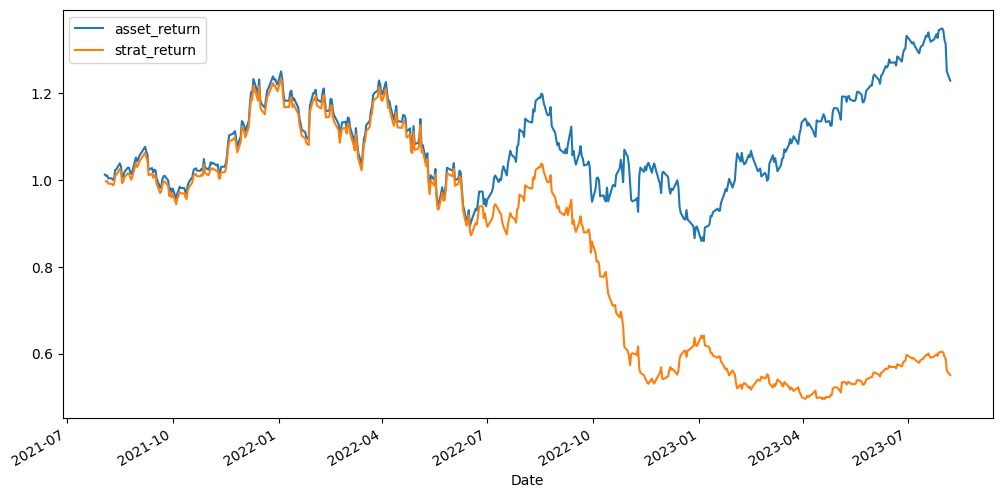

In [4]:
TSMOM_strategy(df)